In [20]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import urllib.request
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [21]:
class Sports247: 
    def __init__(self, name, year):
        """
        Construct a new 'Sports247' object.

        :param name: The name of the school
        :param year: recruitment year for college football players
        :return: returns nothing
        """
        self.name = name
        self.name2 = name.lower()
        self.year = year
        #self.year2ToString = str(self.year2)
        self.url = "http://" + self.name2 +".247sports.com/Season/{0}-Football/Commits".format(self.year)
        
    def WebPageOpen(self):
        try:
            # now, with the below headers, we defined ourselves as a simpleton who is
            # still using internet explorer.
            headers = {}
            headers['User-Agent'] = "Mozilla/5.0 (X11; Linux i686) AppleWebKit/537.17 (KHTML, like Gecko) Chrome/24.0.1312.27 Safari/537.17"
            req = urllib.request.Request(self.url, headers = headers)
            resp = urllib.request.urlopen(req)
            respData = resp.read()

            saveFile = open("/home/jallen2/git/Football_Recruits/Football_Web_Data/" + self.name + str(self.year) +'.txt','w')
            saveFile.write(str(respData))
            saveFile.close()
        except Exception as e:
            print(str(e))
            
    def GetPlayerNames(self):
        with open("/home/jallen2/git/Football_Recruits/Football_Web_Data/" + self.name + str(self.year) +'.txt', 'r') as recruitData:
            html_doc = recruitData.read()
            soup = BeautifulSoup(html_doc, 'html.parser')
        test = soup.find_all("a", class_="name")
        names = [word.string for word in test]
        numberOfPlayers = len(names)
        return names 
            
    def GetAverageStarCount(self):
        with open("/home/jallen2/git/Football_Recruits/Football_Web_Data/" + self.name + str(self.year) +'.txt', 'r') as recruitData:
            html_doc = recruitData.read()
            soup = BeautifulSoup(html_doc, 'html.parser')
        recruits = Sports247(self.name, self.year)
        average = recruits.GetNumberOfStars()/recruits.GetNumberOfPlayers()
        return round(average,3)
    
    def GetNumberOfPlayers(self):
        with open("/home/jallen2/git/Football_Recruits/Football_Web_Data/" + self.name + str(self.year) +'.txt', 'r') as recruitData:
            html_doc = recruitData.read()
            soup = BeautifulSoup(html_doc, 'html.parser')
        test = soup.find_all("a", class_="name")
        names = [word.string for word in test]
        numberOfPlayers = len(names)
        return numberOfPlayers
    
    def GetNumberOfStars(self):
        with open("/home/jallen2/git/Football_Recruits/Football_Web_Data/" + self.name + str(self.year) +'.txt', 'r') as recruitData:
            html_doc = recruitData.read()
            soup = BeautifulSoup(html_doc, 'html.parser')
        count = 0
        data = "data-icon"
        test = soup.find_all("span", class_="yellow")
        for word in test:
            stars = str(word)
            if data in stars:
                count+=1
        return count
    def GetYear(self):
        return self.year
    """
    :param Start: Defaults to 10 years in the past, can be altered to start farther into the past.
                  Limited to the 2000s, but can go farther back if negative numbers are used. 
    :param End: Defaults to 18 which is 1 + the present years last 2 digits. 
    :returns: no data, but prints the Recruitment year and the average stars for that year. 
    
    """
    def AverageStarsPerYear(self, Start=10, End=18, Ave=False):
        CuRecruits = {}
        value = 2000 + Start
        count = 0
        starAverageList = {}
        starsList = []
        years = [] 
        
        if Ave == False:
            print("School: " + self.name + "\n")
        for i in range(Start,End):
            CuRecruits["CuRecruits{0}".format(i)] = Sports247(self.name,value)
            CuRecruits["CuRecruits{0}".format(i)].WebPageOpen()
            if Ave == False:
                print("Recruitment Year: " + str(CuRecruits["CuRecruits{0}".format(i)].GetYear()))
                print("Average Number of Stars: " + str(CuRecruits["CuRecruits{0}".format(i)].GetAverageStarCount()) + "\n")
            else:    
                schoolYear = CuRecruits["CuRecruits{0}".format(i)].GetYear()
                starsList.append(CuRecruits["CuRecruits{0}".format(i)].GetAverageStarCount())
                years.append(schoolYear)
                AverageStarCount = self.name + "_Average_Star_Count"
                starAverageList = {
                                   "Recruitment_Year": years, 
                                   AverageStarCount : starsList
                                    }
                count+=1
            value+=1
        if Ave:
            return starAverageList

In [22]:
%%time
recruits = Sports247("Clemson",2017)
recruits.WebPageOpen()
clemsonDict = recruits.AverageStarsPerYear(Ave=True)

CPU times: user 7.83 s, sys: 30.8 ms, total: 7.86 s
Wall time: 9.57 s


In [23]:
%%time
recruits = Sports247("Alabama",2017)
recruits.WebPageOpen()
alabamaDict = recruits.AverageStarsPerYear(Ave=True)

CPU times: user 8.22 s, sys: 32 ms, total: 8.25 s
Wall time: 16.1 s


In [24]:
%%time
recruits = Sports247("ohiostate",2017)
recruits.WebPageOpen()
ohiostateDict = recruits.AverageStarsPerYear(Ave=True)

CPU times: user 8.35 s, sys: 26.9 ms, total: 8.37 s
Wall time: 10.1 s


In [25]:
CU_DataFrame = pd.DataFrame(clemsonDict)
AL_DataFrame = pd.DataFrame(alabamaDict)
OH_DataFrame = pd.DataFrame(ohiostateDict)

In [29]:
#set one time (uncomment code below)
CU_DataFrame.set_index("Recruitment_Year", inplace = True)
AL_DataFrame.set_index("Recruitment_Year", inplace = True)
OH_DataFrame.set_index("Recruitment_Year", inplace = True)
CuVsAl = pd.concat([CU_DataFrame,AL_DataFrame],axis=1)
CuVsAlVsOh = pd.concat([CuVsAl,OH_DataFrame],axis=1)

In [30]:
CuVsAlVsOh

,Clemson_Average_Star_Count,Alabama_Average_Star_Count,ohiostate_Average_Star_Count
Recruitment_Year,,,
2010,3.000,3.423,2.950
2011,3.167,3.731,3.423
2012,3.300,3.808,3.577
2013,3.478,3.923,3.207
2014,3.333,4.038,2.774
2015,3.500,4.083,3.577
2016,3.619,3.833,3.760
2017,3.929,4.000,4.143


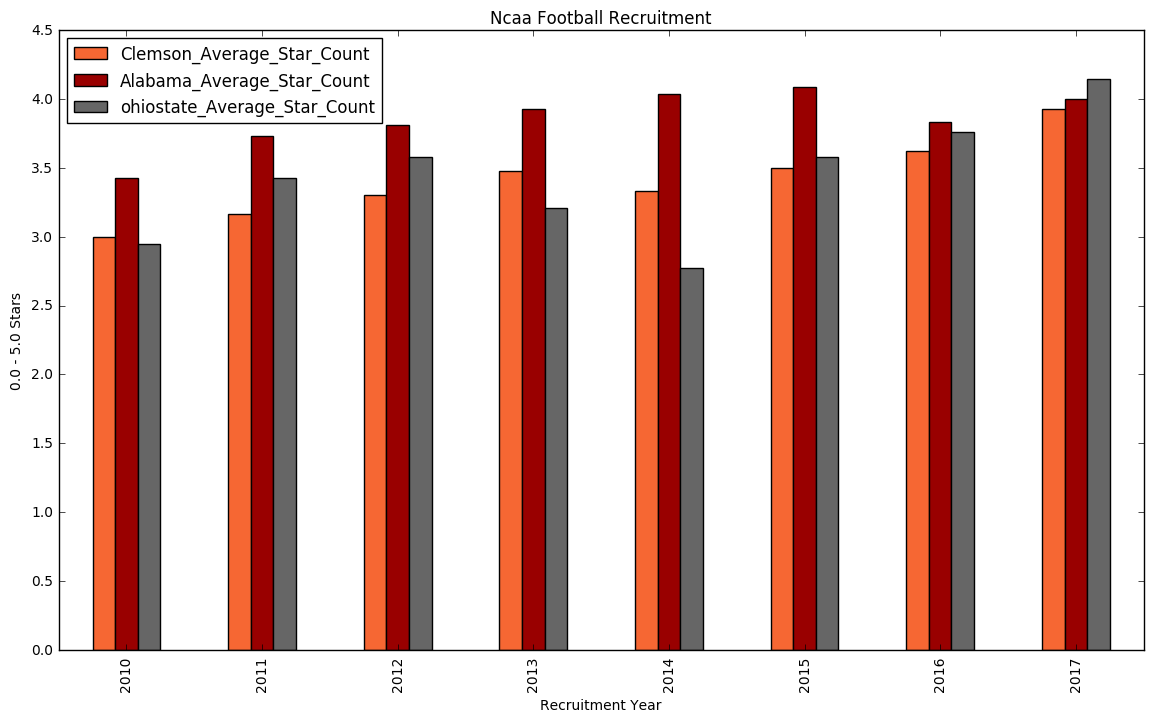

In [34]:
ncaa_plot = CuVsAlVsOh.plot.bar(figsize = (14,8),color=['#F66733','#990000','#666666'],legend=True)
ncaa_plot.set_title('Ncaa Football Recruitment')
ncaa_plot.set_ylabel('0.0 - 5.0 Stars')
ncaa_plot.set_xlabel('Recruitment Year')
plt.show()